In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

We'll use plotly for this project just because I want to learn something new. YAY!

In [10]:
data = pd.read_csv('retail_price.csv')

In [11]:
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


Also learned about this now and I absolutely love this, never knew I could transpose this when I have loads of features.

In [12]:
data.head().T

,0,1,2,3,4
product_id,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017
qty,1,3,6,4,2
total_price,45.95,137.85,275.7,183.8,91.9
freight_price,15.1,12.933333,14.84,14.2875,15.1
unit_price,45.95,45.95,45.95,45.95,45.95
product_name_lenght,39,39,39,39,39
product_description_lenght,161,161,161,161,161
product_photos_qty,2,2,2,2,2


- Below are all the features in the data:

    - product_id: A unique identifier for each product in the dataset.
    - product_category_name: The name of the product category to which the product belongs.
    - month_year: The month and year of the retail transaction or data recording.
    - qty: The quantity of the product sold or purchased in a given transaction.
    - total_price: The total price of the product, including any applicable taxes or discounts.
    - freight_price: The cost of shipping or freight associated with the product.
    - unit_price: The price of a single unit of the product.
    - product_name_length: The length of the product name in terms of the number of characters.
    - product_description_length: The length of the product description in terms of the number of characters.
    - product_photos_qty: The number of photos available for the product in the dataset.
    - product_weight_g: The weight of the product in grams.
    - product_score: A score or rating associated with the product’s quality, popularity, or other relevant factors.
    - customers: The number of customers who purchased the product in a given transaction.
    - weekday: The day of the week on which the transaction occurred.
    - weekend: A binary flag indicating whether the transaction occurred on a weekend (1) or not (0).
    - holiday: A binary flag indicating whether the transaction occurred on a holiday (1) or not (0).
    - month: The month in which the transaction occurred.
    - year: The year in which the transaction occurred.
    - s: the effect of seasonality
    - comp_1, comp_2, comp_3: Competitor information or variables related to competitors’ prices, promotions, or other relevant factors.
    - ps1, ps2, ps3: Product score or rating associated with competitors’ products.
    - fp1, fp2, fp3: Freight or shipping cost associated with competitors’ products.


In [13]:
data.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

No null values.

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


Let's understand this one by one - 
- qty => Seems to have some large values might be bulk orders (will have to check as rarely anybody orders normal stuff in bulk - check unique values)
- total_price => affected by 'qty', somewhat proportional. A little weird might be skewd because of qty.
- freight_price => related to the weight of the package. Looks normal.
- unit_price => looks normal
- product_name_lenght => will have to check for association.
- product_description_lenght => will have to check for association.
- product_photos_qty => will have to check for association.
- product_weight_g => might have some outliers as max is too big.
- product_score => std too low might make bins.
- customers => looks normal.
- weekday => std too low might make bins.
- weekend => std too low might make bins.
- holiday => std too low might make bins.
- month => looks normal.
- year => std too low might make bins
- s => might have some outliers as max is too big.
- volume => looks normal.
- comp_1/2/3 => might find some outliers.
- ps1/2/3 => std too low might make bins
- fp1/2/3 => might find some outliers.
- lag_price => might find some outliers.

In [15]:
px.histogram(data, x='total_price', nbins=20, title='Total Price Distribution')


Skewed distribution. Might transform it before modelling.

In [16]:
px.box(data, 
             y='unit_price', 
             title='Box Plot of Unit Price')

A little skewed and some outliers too.

In [17]:
px.scatter(data, 
                 x='qty', 
                 y='total_price', 
                 title='Quantity vs Total Price', trendline="ols")

Thus, the relationship between quantity and total prices is linear. It indicates that the price structure is based on a fixed unit price, where the total price is calculated by multiplying the quantity by the unit price.

In [18]:
px.bar(data, x='product_category_name', 
             y='total_price', 
             title='Average Total Price by Product Category')

- health_beauty and watches_gifts are the most expensive ones.
- consoles_games and perfumery are the least.

In [19]:
px.box(data, x='weekday', 
             y='total_price', 
             title='Box Plot of Total Price by Weekday')

In [20]:
px.box(data, x='holiday', 
             y='total_price', 
             title='Box Plot of Total Price by Holiday')

In [21]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])


In [22]:
correlation_matrix = numerical_data.corr()
fig = go.Figure(go.Heatmap(x=correlation_matrix.columns, 
                           y=correlation_matrix.columns, 
                           z=correlation_matrix.values))
fig.update_layout(title='Correlation Heatmap of Numerical Features')
fig.show()

In [23]:
data['comp_price_diff'] = data['unit_price'] - data['comp_1'] 

avg_price_diff_by_category = data.groupby('product_category_name')['comp_price_diff'].mean().reset_index()

fig = px.bar(avg_price_diff_by_category, 
             x='product_category_name', 
             y='comp_price_diff', 
             title='Average Competitor Price Difference by Product Category')
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Average Competitor Price Difference'
)
fig.show()

#### Optimization Modelling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = numerical_data.drop('total_price', axis=1)
y = data['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

# Train a linear regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
y_pred = model.predict(X_test)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. Actual Retail Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

In [26]:
mean_squared_error(y_test, y_pred)

459586.4269110295

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 218611.35741661215


In [28]:
from bayes_opt import BayesianOptimization
import numpy as np


def pricing_function(price):
    avg_demand = np.mean(data["qty"])
    price_sensitivity = -0.05
    estimated_demand = avg_demand * np.exp(price_sensitivity * (price - data["unit_price"].mean()))
    revenue = price * estimated_demand
    return revenue


pbounds = {'price': (data['unit_price'].min(), data['unit_price'].max())}

optimizer = BayesianOptimization(
    f=pricing_function,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(init_points=5, n_iter=5)

best_price = optimizer.max['params']['price']
print(f"Best price to maximize revenue: ${best_price:.2f}")


|   iter    |  target   |   price   |
-------------------------------------
| 1         | 137.7     | 163.4     |
| 2         | 1.222     | 267.8     |
| 3         | 2.19e+04  | 19.94     |
| 4         | 751.3     | 123.9     |
| 5         | 6.204e+03 | 70.4      |
| 6         | 2.189e+04 | 20.81     |
| 7         | 0.01353   | 364.0     |
| 8         | 2.01e+04  | 29.47     |
| 9         | 13.06     | 216.1     |
| 10        | 2.19e+04  | 19.9      |
Best price to maximize revenue: $19.94


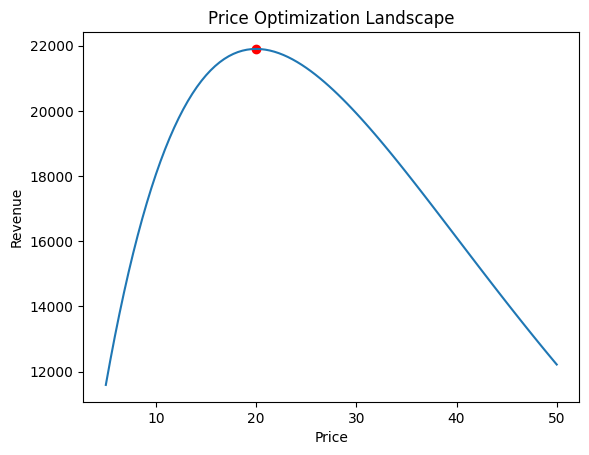

In [30]:
import matplotlib.pyplot as plt

prices = np.linspace(5, 50, 100)
revenues = [pricing_function(p) for p in prices]

plt.plot(prices, revenues)
plt.scatter(best_price, optimizer.max['target'], c='red')
plt.title("Price Optimization Landscape")
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.show()


In [46]:
df = pd.read_csv("retail_price.csv")

In [ ]:
df['sales'] = df['qty'] * df['unit_price']

In [48]:
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,sales
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000,45.950000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000,137.850000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000,275.700000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000,183.800000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000,91.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000,215.000000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000,2090.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000,12095.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000,10374.509803


In [ ]:
import pandas as pd
import numpy as np
from bayes_opt import BayesianOptimization

# Dictionary to store best prices for each product type
best_prices = {}

# Iterate through each product type
for product in df["product_id"].unique():
    df_product = df[df["product_id"] == product]

    # Estimate base demand and price elasticity (you can refine these)
    base_demand = df_product["sales"].mean()  # Average sales as base demand
    price_elasticity = 0.2  # Assumed elasticity (can be estimated from data)

    # Define the pricing function for Bayesian Optimization
    def pricing_function(price):
        demand = simulated_demand(price, base_demand, price_elasticity)
        return price * demand  # Revenue = Price * Demand

    # Define the bounds for price optimization (adjust as needed)
    pbounds = {'price': (df_product["unit_price"].min(), df_product["unit_price"].max())}

    # Run Bayesian Optimization
    optimizer = BayesianOptimization(
        f=pricing_function,
        pbounds=pbounds,
        random_state=1,
    )
    
    optimizer.maximize(init_points=5, n_iter=5)

    # Store the best price for this product type
    best_price = optimizer.max["params"]["price"]
    best_prices[product] = best_price

    print(f"Best price for Product {product}: ${best_price:.2f}")
    break
# Convert results to a DataFrame
best_price_df = pd.DataFrame(list(best_prices.items()), columns=["product_id", "best_price"])
print(best_price_df)


|   iter    |  target   |   price   |
-------------------------------------
| 1         | 6.61e+03  | 42.04     |
| 2         | 6.653e+03 | 44.07     |
| 3         | 6.525e+03 | 39.24     |
| 4         | 6.589e+03 | 41.27     |
| 5         | 6.558e+03 | 40.22     |
| 6         | 6.681e+03 | 45.95     |
| 7         | 6.681e+03 | 45.95     |
| 8         | 6.681e+03 | 45.95     |
| 9         | 6.681e+03 | 45.95     |
| 10        | 6.681e+03 | 45.95     |
Best price for Product bed1: $45.95
  product_id  best_price
0       bed1       45.95


In [53]:
import gym
from gym import spaces
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise

class DynamicPricingEnv(gym.Env):
    def __init__(self, df):
        super(DynamicPricingEnv, self).__init__()
        self.df = df
        self.current_step = 0
        self.action_space = spaces.Box(low=df['unit_price'].min(), high=df['unit_price'].max(), shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(2,), dtype=np.float32)
    
    def reset(self):
        self.current_step = 0
        initial_price = self.df.iloc[self.current_step]['unit_price']
        initial_demand = self.df.iloc[self.current_step]['qty']
        return np.array([initial_price, initial_demand], dtype=np.float32)
    
    def step(self, action):
        # Simulate demand response to price
        price = action[0]
        base_demand = self.df.iloc[self.current_step]["sales"]
        price_elasticity = 0.2  # Assumed elasticity

        demand = base_demand * (1 - price_elasticity * (price / self.df["unit_price"].mean()))

        # Reward: Revenue = Price * Demand
        reward = price * demand

        self.current_step += 1
        done = self.current_step >= len(self.df) - 1

        next_obs = np.array([price, demand], dtype=np.float32)
        return next_obs, reward, done, {}

    def render(self, mode="human"):
        pass

In [57]:
# Load data
df = pd.read_csv("retail_price.csv")  # Ensure this contains sales & unit_price

df['sales'] = df['qty'] * df['unit_price']

# Create the environment
env = DynamicPricingEnv(df)

# Define noise for exploration
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# Train the RL model
model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/puskchan/ML_projects/venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



----------------------------------
| rollout/           |           |
|    ep_len_mean     | 675       |
|    ep_rew_mean     | 1.12e+08  |
| time/              |           |
|    episodes        | 4         |
|    fps             | 117       |
|    time_elapsed    | 23        |
|    total_timesteps | 2700      |
| train/             |           |
|    actor_loss      | -1.76e+06 |
|    critic_loss     | 2.11e+11  |
|    learning_rate   | 0.001     |
|    n_updates       | 2599      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 675       |
|    ep_rew_mean     | 1.12e+08  |
| time/              |           |
|    episodes        | 8         |
|    fps             | 115       |
|    time_elapsed    | 46        |
|    total_timesteps | 5400      |
| train/             |           |
|    actor_loss      | -3.53e+06 |
|    critic_loss     | 1.88e+11  |
|    learning_rate   | 0.001     |
|    n_updates      

In [58]:
obs = env.reset()
for _ in range(50):  # Run for 50 time steps
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    print(f"Price: {action[0]:.2f}, Revenue: {reward:.2f}")
    if done:
        break


Price: 364.00, Revenue: 5292.23
Price: 364.00, Revenue: 15876.70
Price: 364.00, Revenue: 31753.40
Price: 364.00, Revenue: 21168.93
Price: 364.00, Revenue: 10584.47
Price: 364.00, Revenue: 15876.70
Price: 364.00, Revenue: 51350.21
Price: 364.00, Revenue: 27634.79
Price: 364.00, Revenue: 87510.16
Price: 364.00, Revenue: 82904.36
Price: 364.00, Revenue: 78298.57
Price: 364.00, Revenue: 59875.37
Price: 364.00, Revenue: 87510.16
Price: 364.00, Revenue: 23028.99
Price: 364.00, Revenue: 36846.38
Price: 364.00, Revenue: 36155.34
Price: 364.00, Revenue: 48303.87
Price: 364.00, Revenue: 28551.57
Price: 364.00, Revenue: 224792.05
Price: 364.00, Revenue: 82003.71
Price: 364.00, Revenue: 102504.63
Price: 364.00, Revenue: 78471.71
Price: 364.00, Revenue: 102619.81
Price: 364.00, Revenue: 159630.81
Price: 364.00, Revenue: 193837.41
Price: 364.00, Revenue: 125424.21
Price: 364.00, Revenue: 45839.15
Price: 364.00, Revenue: 23265.10
Price: 364.00, Revenue: 11632.55
Price: 364.00, Revenue: 11632.55
Price